In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')
from MITgcmutils import rdmds

In [2]:
def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data

def read_float64(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f8'))
        print(np.shape(data))
    return data


In [3]:
run_dir = '/nobackup/sreich/llc270_c68w_runs/run_pk0000841536_obsfit_misfit/'

equi = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.equi.nc')
equi

<xarray.Dataset>
Dimensions:   (iOBS: 3345176)
Dimensions without coordinates: iOBS
Data variables:
    mod_val   (iOBS) float64 ...
    mod_mask  (iOBS) float64 ...

In [4]:
np.unique(equi.mod_val.values)

array([-1.49272245, -1.49253014, -1.49187121, ...,  0.01467781,
        0.01583717,         nan])

In [5]:
tile160 = read_float64(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.081.001.equi.data')
np.unique(tile160)

(3023880,)


array([-5.93719768e-01, -5.92579316e-01, -5.91826867e-01, ...,
        1.63258100e+06,  1.63258200e+06,  1.63258300e+06])

## look at misfits

In [6]:
misfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.misfit.nc')
misfit

<xarray.Dataset>
Dimensions:  (iOBS: 3345176)
Dimensions without coordinates: iOBS
Data variables:
    misfit   (iOBS) float64 ...

In [7]:
np.unique(misfit.misfit.values)

array([-1.00008591e+04, -1.00008564e+04, -1.00008313e+04, ...,
        1.40846429e+00,  1.42453717e+00,             nan])

In [8]:
obsfit = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.nc')
obsfit

<xarray.Dataset>
Dimensions:               (iOBS: 3345176, iSAMPLE: 3345176, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 ...
    obs_YYYYMMDD          (iOBS) int64 ...
    obs_HHMMSS            (iOBS) int64 ...
    sample_x              (iSAMPLE) float64 ...
    sample_y              (iSAMPLE) float64 ...
    sample_z              (iSAMPLE) float64 ...
    ...                    ...
    sample_interp_YC11    (iOBS) float64 ...
    sample_interp_XCNINJ  (iOBS) float64 ...
    sample_interp_YCNINJ  (iOBS) float64 ...
    sample_interp_i       (iOBS) float64 ...
    sample_interp_j       (iOBS) float64 ...
    sample_interp_w       (iOBS, iINTERP) float64 ...

In [13]:
np.unique(sea_surface_height)

array([-1.5558    , -1.5537    , -1.5531    , ...,  1.83125234,
        1.8564    ,  1.85909697])

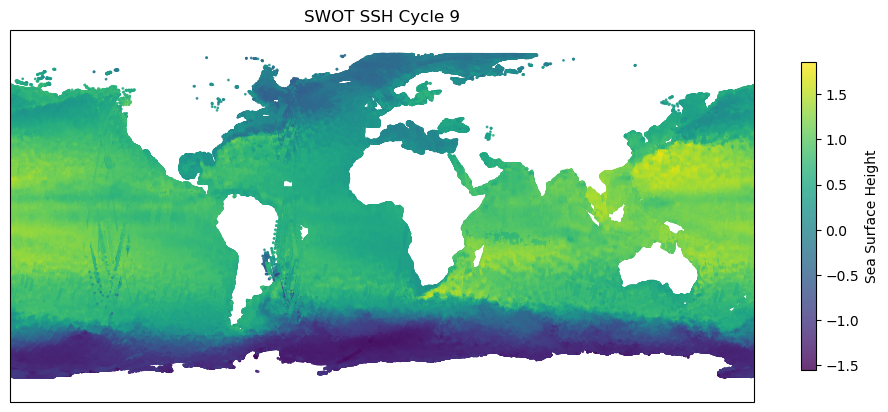

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming 'ds' is your xarray dataset
latitudes = obsfit['sample_y'].values
longitudes = obsfit['sample_x'].values
sea_surface_height = obsfit['obs_val'].values

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add coastlines and land features
# ax.coastlines()
# ax.add_feature(cfeature.LAND, facecolor='lightgray')
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
# ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the scatter plot
sc = ax.scatter(latitudes, longitudes, c=sea_surface_height, cmap='viridis', s=1, transform=ccrs.PlateCarree(), alpha=0.8)

# Add a colorbar
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.5, label='Sea Surface Height')

# Add titles and labels
plt.title('SWOT SSH Cycle 9')
plt.show()

In [18]:
fld = misfit['misfit'].values
np.unique(fld)

array([-1.00008591e+04, -1.00008564e+04, -1.00008313e+04, ...,
        1.40846429e+00,  1.42453717e+00,             nan])

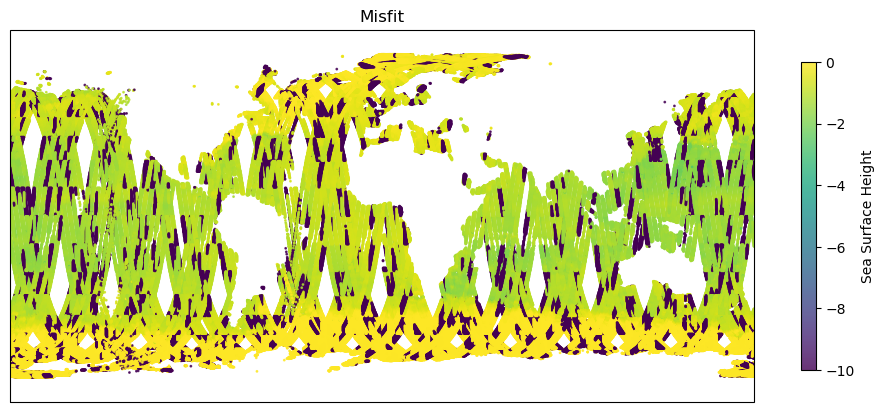

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

latitudes = obsfit['sample_y'].values
longitudes = obsfit['sample_x'].values
fld = misfit['misfit'].values

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Plot the scatter plot
sc = ax.scatter(latitudes, longitudes, c=fld, cmap='viridis', s=1, transform=ccrs.PlateCarree(), alpha=0.8, vmin = -10, vmax=0)

# Add a colorbar
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.5, label='Sea Surface Height')

# Add titles and labels
plt.title('Misfit')
plt.show()

## subset input datafile

In [6]:
#data_dir = '/nobackup/sreich/swot/swot_obsfit_L3/'
obs = xr.open_dataset(run_dir + 'swot_cycles_009_llc270_45_test_obsfit.nc')
obs

<xarray.Dataset>
Dimensions:               (iOBS: 3345176, iSAMPLE: 3345176, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 ...
    obs_YYYYMMDD          (iOBS) int64 ...
    obs_HHMMSS            (iOBS) int64 ...
    sample_x              (iSAMPLE) float64 ...
    sample_y              (iSAMPLE) float64 ...
    sample_z              (iSAMPLE) float64 ...
    ...                    ...
    sample_interp_YC11    (iOBS) float64 ...
    sample_interp_XCNINJ  (iOBS) float64 ...
    sample_interp_YCNINJ  (iOBS) float64 ...
    sample_interp_i       (iOBS) float64 ...
    sample_interp_j       (iOBS) float64 ...
    sample_interp_w       (iOBS, iINTERP) float64 ...

In [12]:
obs.sample_interp_XC11.values

array([-38.41825867, -38.41825867, -38.41825867, ...,  52.        ,
        52.        ,  52.        ])

In [7]:
sub = obs.isel(iOBS = range(100), iSAMPLE = range(100))
sub

<xarray.Dataset>
Dimensions:               (iOBS: 100, iSAMPLE: 100, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 ...
    obs_YYYYMMDD          (iOBS) int64 ...
    obs_HHMMSS            (iOBS) int64 ...
    sample_x              (iSAMPLE) float64 ...
    sample_y              (iSAMPLE) float64 ...
    sample_z              (iSAMPLE) float64 ...
    ...                    ...
    sample_interp_YC11    (iOBS) float64 ...
    sample_interp_XCNINJ  (iOBS) float64 ...
    sample_interp_YCNINJ  (iOBS) float64 ...
    sample_interp_i       (iOBS) float64 ...
    sample_interp_j       (iOBS) float64 ...
    sample_interp_w       (iOBS, iINTERP) float64 ...

In [14]:
#obs.to_netcdf(run_dir + 'swot_cycles_009_llc270_45_test_100_obsfit')

In [13]:
sub.sample_interp_XC11.values

array([-38.41825867, -38.41825867, -38.41825867, -38.41825867,
       -38.41825867, -38.41825867, -38.41825867, -38.41825867,
       -38.41825867, -38.41825867, -38.41825867, -38.41825867,
       -38.41825867, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83333397,
       -22.83333397, -22.83333397, -22.83333397, -22.83

In [14]:
xc = rdmds(run_dir + 'XC')
xc

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-38.03704071, -38.05221558, -38.06198883, ..., -38.16666794,
        -38.16666794, -38.16666794],
       [-38.16666794, -38.16666794, -38.16666794, ..., -38.16666794,
        -38.16666794, -38.16666794],
       [-38.16666794, -38.16666794, -38.16666794, ...,   0.        ,
          0.        ,   0.        ]])

In [33]:
xc_flats = xc.flatten()

sub = obs.sample_interp_XC11.values[300000:400000]

tf = []
for i in range(len(sub)):
    tf.append(sub[i] in xc_flats)

In [34]:
np.unique(tf)

array([ True])

In [22]:
len(obs.sample_interp_XC11.values)

3345176